## Final Project Submission

Please fill out:
* Student name: Torben Holst 


In [1]:
reset -fs

# King County, Washington: House Price Prediction
### Data Science - Project

![King_County](King_County.jpg)

## Setting up the Notebook

In [121]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix 
import statsmodels.api as sms 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model
import sklearn
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')

# 1. Business Understanding

"Ask relevant questions and define objectives for the problem that needs to be tackled."

**Finding an affordable house with a "fair" price for a family**

this includes the following aspects
* only houses below 1.5 Mio USD for limiting the financial risk
* realistic lot and living size: not too big, should be maintainable by yourself
* minimum 3 bedrooms
* minimum 1.5 bathrooms
* ...

#### **How can we save money when buying a house**

# 2. Data Mining
"Gather and scrape the data necessary for the project."

In [3]:
# importing the data
houses_df = pd.read_csv('King_County_House_prices_dataset.csv', parse_dates=[1])

In [4]:
# Creating a copy of the dataframe to work on
df_house = houses_df.copy()

In [5]:
# First look on the columns / variables in the data
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# description of the variables (from column_names.md)

### Column names + description
* **id** - unique identified for a house
* **date** - when the house was sold
* **price** -  is prediction target
* **bedrooms** -  number of Bedrooms/House
* **bathrooms** -  number of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Explanation of BUILDING GRADE
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

* 1-3: Falls short of minimum building standards. Normally cabin or inferior structure.
* 4: Generally older, low quality construction. Does not meet code.
* 5: Low construction costs and workmanship. Small, simple design.
* 6: Lowest grade currently meeting building code. Low quality materials and simple designs.
* 7: Average grade of construction and design. Commonly seen in plats and older sub-divisions.
* 8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* 9: Better architectural design with extra interior and exterior design and quality.
* 10: Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
* 11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
* 12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* 13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

[LINK](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

### Explanation of BUILDING CONDITION
Relative to age and grade. Coded 1-5:

* **1 = Poor- Worn out:** Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
* **2 = Fair- Badly worn:** Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
* **3 = Average:** Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
* **4 = Good:** No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
* **5 = Very Good:** All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

[LINK](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

# 3. Data Cleaning
"Fix the inconsistencies within the data and handle the missing values."

### Getting a first overview of the data 

In [6]:
df_house.head(3)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  

[3 rows x 21 columns]

In [7]:
df_house.tail(3)

id       date     price  bedrooms  bathrooms  sqft_living  \
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[3 rows x 21 columns]

In [8]:
df_house.describe().round(2)

id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.159700e+04    21597.00  21597.00   21597.00     21597.00    21597.00   
mean   4.580474e+09   540296.57      3.37       2.12      2080.32    15099.41   
std    2.876736e+09   367368.14      0.93       0.77       918.11    41412.64   
min    1.000102e+06    78000.00      1.00       0.50       370.00      520.00   
25%    2.123049e+09   322000.00      3.00       1.75      1430.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10685.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count  21597.00    19221.00  21534.00   21597.00  21597.00    21597.00   
mean       1.49        0.01      0.23       3.41      7.66     1788.60   
std        0.54        0.09      0.77       0.65      1.17      827.76   
min        1.00        0.00      0.00       1.00      3.00      370.00   
25%        1.00        0.00      0.00       3.00      7.00     1190.00   
50%        1.50        0.00      0.00       3.00      7.00     1560.00   
75%        2.00        0.00      0.00       4.00      8.00     2210.00   
max        3.50        1.00      4.00       5.00     13.00     9410.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21597.00      17755.00  21597.00  21597.00  21597.00       21597.00   
mean    1971.00         83.64  98077.95     47.56   -122.21        1986.62   
std       29.38        399.95     53.51      0.14      0.14         685.23   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1951.00          0.00  98033.00     47.47   -122.33        1490.00   
50%     1975.00          0.00  98065.00     47.57   -122.23        1840.00   
75%     1997.00          0.00  98118.00     47.68   -122.12        2360.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        6210.00   

       sqft_lot15  
count    21597.00  
mean     12758.28  
std      27274.44  
min        651.00  
25%       5100.00  
50%       7620.00  
75%      10083.00  
max     871200.00

In [9]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Starting with the obvious: sqft_basement seems to be strange

In [10]:
# Printing the unique values for this attribute we see a '?'
df_house.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [6]:
# converting sqft_basement from categorical to float, replacing question mark for 0 which means no basement
df_house.sqft_basement = df_house.sqft_basement.str.replace('?', '0.0')
df_house.sqft_basement = df_house.sqft_basement.astype(float).round().astype(int)

In [7]:
# biggest house, looking at the sqft_living
df_house[df_house['sqft_living']==df_house.sqft_living.max()]

id       date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038 2014-05-05  2280000.0         7        8.0        13540   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
12764    307752     3.0         0.0   4.0  ...     12        9410   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
12764           4130      1999           0.0    98053  47.6675 -121.986   

       sqft_living15  sqft_lot15  
12764           4850      217800  

[1 rows x 21 columns]

In [8]:
# biggest house, looking at the sqft_lot
df_house[df_house['sqft_lot']==df_house.sqft_lot.max()]

id       date     price  bedrooms  bathrooms  sqft_living  \
1717  1020069017 2015-03-27  700000.0         4        1.0         1300   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1717   1651359     1.0         0.0   3.0  ...      6        1300   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1717              0      1920           0.0    98022  47.2313 -122.023   

      sqft_living15  sqft_lot15  
1717           2560      425581  

[1 rows x 21 columns]

In [9]:
# Most expensive house
df_house[df_house['price']==df_house.price.max()]

id       date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020 2014-10-13  7700000.0         6        8.0        12050   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245     27600     2.5         0.0   3.0  ...     13        8570   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245           3480      1910        1987.0    98102  47.6298 -122.323   

      sqft_living15  sqft_lot15  
7245           3940        8800  

[1 rows x 21 columns]

### Looking at the NaN

In [10]:
missing = pd.DataFrame(df_house.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df_house.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

Of the 21 variables 3 have missing values. 
- **waterfront** has 2376 instances or 11 percent missing values --> I assume, this this attribut has a price effect so it would not be neglected --> setting all NaN-Values to 0
- **view** is not known in 63 cases or 0.3 percent --> will be set to the most common value: 0
- for **yr_renovated** there are 3842 unknown values which is 17.8 % --> will be set to the most common value: 0

In [11]:
# waterfront: replacing nan with 0 as it is for most of the other values
df_house.waterfront.value_counts()
df_house.waterfront.fillna(0,inplace=True)
#additionaly there is no reasing for this being a float
df_house.waterfront = df_house.waterfront.astype(int)

In [12]:
# view: most of the values are 0, so NaN will be replaced by 0
# no reason for being float
df_house.view.fillna(0, inplace=True)
df_house.view = df_house.view.astype(int)

In [13]:
# yr_renovated: most of values are =, so NaN will be replaced by =
# no reason for being float
df_house.yr_renovated.fillna(0, inplace=True)
df_house.yr_renovated = df_house.yr_renovated.astype(int)

### Additional Cleaning

In [14]:
# no float needed for price as the ct values do not matter
df_house.price = df_house.price.astype(int)

In [15]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(16)
memory usage: 3.5 MB


In [16]:
# bedrooms has an outlier of 33 rooms which seems to be incorrect
df_house.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df_house[df_house['bedrooms']==33]

id       date   price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0           0     0  ...      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856            580      1947             0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [18]:
df_house.query('sqft_living > 1500 and sqft_living < 1750 and floors == 1.0 and yr_built < 1960 and bedrooms < 33').bedrooms.median()

3.0

In [19]:
# All houses with comparable attributes have between 1 and 6 bedrooms with a mean and a median around 3
# 1620 sqft for 33 bedrooms would be a mean room size of around 49 sqft which is less then 5 qm
# So I will assume, that this is a typo and should be 3!

In [22]:
df_house.bedrooms.replace(to_replace=33,value=3, inplace=True)
df_house.bedrooms[15856]

3

In [23]:
# possible resales? some ids are more than once in the dataset:
df_house.id.value_counts().head(10)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64

In [24]:
df_house[df_house['id']==795000620]

id       date   price  bedrooms  bathrooms  sqft_living  \
17588  795000620 2014-09-24  115000         3        1.0         1080   
17589  795000620 2014-12-15  124000         3        1.0         1080   
17590  795000620 2015-03-11  157000         3        1.0         1080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17588      6250     1.0           0     0  ...      5        1080   
17589      6250     1.0           0     0  ...      5        1080   
17590      6250     1.0           0     0  ...      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17588              0      1950             0    98168  47.5045 -122.33   
17589              0      1950             0    98168  47.5045 -122.33   
17590              0      1950             0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

In [25]:
df_house.describe().round()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  2.159700e+04    21597.0   21597.0    21597.0      21597.0    21597.0   
mean   4.580474e+09   540297.0       3.0        2.0       2080.0    15099.0   
std    2.876736e+09   367368.0       1.0        1.0        918.0    41413.0   
min    1.000102e+06    78000.0       1.0        0.0        370.0      520.0   
25%    2.123049e+09   322000.0       3.0        2.0       1430.0     5040.0   
50%    3.904930e+09   450000.0       3.0        2.0       1910.0     7618.0   
75%    7.308900e+09   645000.0       4.0        2.0       2550.0    10685.0   
max    9.900000e+09  7700000.0      11.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  \
count  21597.0     21597.0  21597.0    21597.0  21597.0     21597.0   
mean       1.0         0.0      0.0        3.0      8.0      1789.0   
std        1.0         0.0      1.0        1.0      1.0       828.0   
min        1.0         0.0      0.0        1.0      3.0       370.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0   
50%        2.0         0.0      0.0        3.0      7.0      1560.0   
75%        2.0         0.0      0.0        4.0      8.0      2210.0   
max        4.0         1.0      4.0        5.0     13.0      9410.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
count        21597.0   21597.0       21597.0  21597.0  21597.0  21597.0   
mean           286.0    1971.0          69.0  98078.0     48.0   -122.0   
std            440.0      29.0         364.0     54.0      0.0      0.0   
min              0.0    1900.0           0.0  98001.0     47.0   -123.0   
25%              0.0    1951.0           0.0  98033.0     47.0   -122.0   
50%              0.0    1975.0           0.0  98065.0     48.0   -122.0   
75%            550.0    1997.0           0.0  98118.0     48.0   -122.0   
max           4820.0    2015.0        2015.0  98199.0     48.0   -121.0   

       sqft_living15  sqft_lot15  
count        21597.0     21597.0  
mean          1987.0     12758.0  
std            685.0     27274.0  
min            399.0       651.0  
25%           1490.0      5100.0  
50%           1840.0      7620.0  
75%           2360.0     10083.0  
max           6210.0    871200.0

# 4. Data Exploration (EDA)
"Form hypotheses about your defined problem by visually analyzing the data."

### Exploring the data with the usual suspects first - Histogram, Scatter Plot, Box Diagram

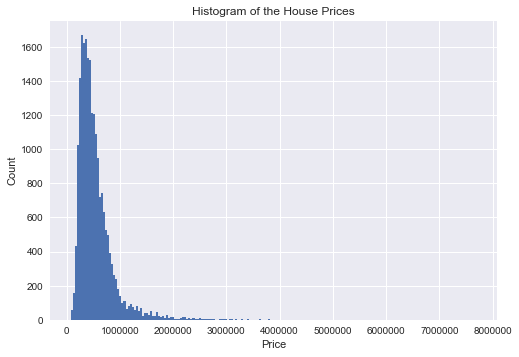

In [26]:
# plot the histogram of the house prices
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of the House Prices')
df_house.price.hist(bins=200)
plt.savefig('figures/price_hist')

shows a quite long tail: prices above 1.5m USD not relevant for business case so will be cut

### PDF for the 'price'

In [35]:
from numpy.random import normal
from scipy.stats import norm

In [36]:
μ, σ = norm.fit(df_house.price)

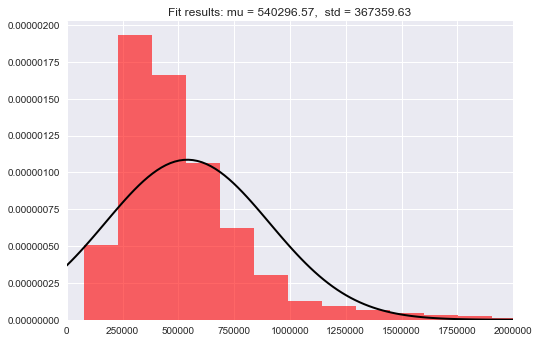

In [37]:
# Plot the histogram.
plt.hist(df_house.price, bins=50, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim(0,2000000)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

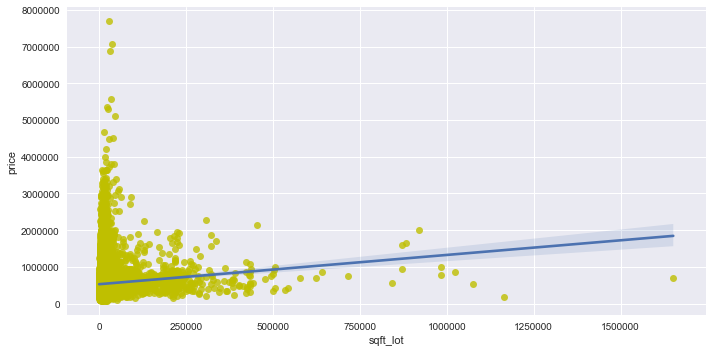

In [38]:
# plotting lot size and price
sns.lmplot(x='sqft_lot', y='price', data=df_house, aspect=2,scatter_kws={'color':'y'})

A wide range of lot sizes can be seen. 
For a normal family as the basis of this business case a lot size > 25000 sqft (around 2300 sqm) is unneccesary

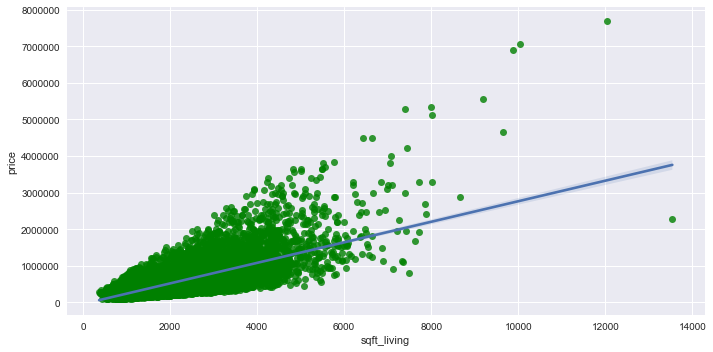

In [39]:
# plotting living size and price
sns.lmplot(x='sqft_living', y='price', data=df_house, aspect=2,scatter_kws={'color':'g'})

Also for living_size the range is quite big. Cutting the data at 6000 sqft should be definitely enough, even for a big family

In [360]:
# Filtering was was stated above:
# prices above 2 Mio:
df_house.drop(index=df_house.query('price > 1500000').index, inplace=True)
# living space above 6000 sqft and lotsize above 25000:
df_house.drop(index=df_house.query('sqft_living > 6000').index, inplace=True)
df_house.drop(index=df_house.query('sqft_lot > 25000').index, inplace=True)
# as stated in business case: >=3 bedrooms and >=1.5 bathrooms
df_house.drop(index=df_house.query('bathrooms < 1.5').index, inplace=True)
df_house.drop(index=df_house.query('bedrooms < 3').index, inplace=True)
df_house.describe().round()

price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
count    14402.0   14402.0    14402.0      14402.0   14402.0  14402.0   
mean    532021.0       4.0        2.0       2208.0    7970.0      2.0   
std     252642.0       1.0        1.0        722.0    4195.0      1.0   
min     107000.0       3.0        2.0        710.0     520.0      1.0   
25%     340000.0       3.0        2.0       1670.0    5040.0      1.0   
50%     475000.0       3.0        2.0       2080.0    7476.0      2.0   
75%     660000.0       4.0        2.0       2620.0    9800.0      2.0   
max    1500000.0      11.0        8.0       5960.0   25000.0      4.0   

       waterfront     view  condition    grade  sqft_basement  yr_built  \
count     14402.0  14402.0    14402.0  14402.0        14402.0   14402.0   
mean          0.0      0.0        3.0      8.0          324.0    1977.0   
std           0.0      1.0        1.0      1.0          442.0      28.0   
min           0.0      0.0        1.0      5.0            0.0    1900.0   
25%           0.0      0.0        3.0      7.0            0.0    1960.0   
50%           0.0      0.0        3.0      8.0            0.0    1979.0   
75%           0.0      0.0        4.0      8.0          650.0    2001.0   
max           1.0      4.0        5.0     12.0         2850.0    2015.0   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count       14402.0  14402.0  14402.0  14402.0        14402.0     14402.0  
mean           64.0  98073.0     48.0   -122.0         2054.0      7837.0  
std           352.0     53.0      0.0      0.0          616.0      4452.0  
min             0.0  98001.0     47.0   -122.0          460.0       651.0  
25%             0.0  98031.0     47.0   -122.0         1600.0      5100.0  
50%             0.0  98058.0     48.0   -122.0         1940.0      7508.0  
75%             0.0  98116.0     48.0   -122.0         2400.0      9584.0  
max          2015.0  98199.0     48.0   -121.0         5790.0     93393.0

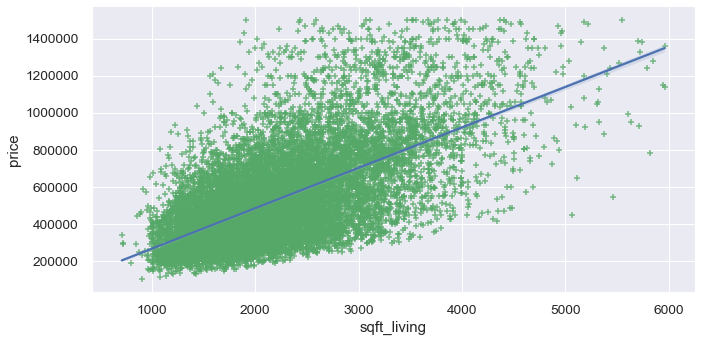

In [361]:
# plotting living size and price for adjusted data
sns.lmplot(x='sqft_living', y='price', data=df_house, aspect=2,scatter_kws={'color':'g'},markers=['+'])
plt.savefig('figures/scatter_price_sqftliv.png')

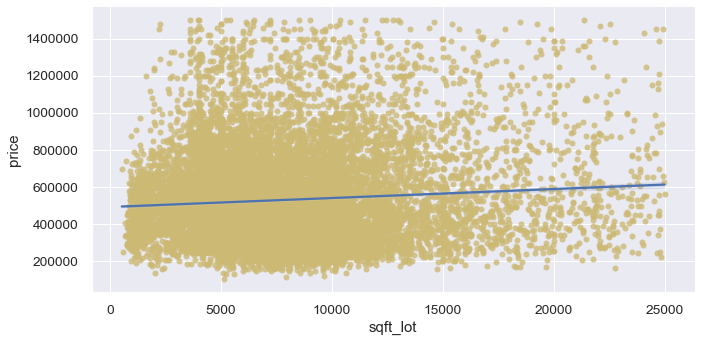

In [362]:
# plotting lot size and price
sns.lmplot(x='sqft_lot', y='price', data=df_house, aspect=2,scatter_kws={'color':'y'})

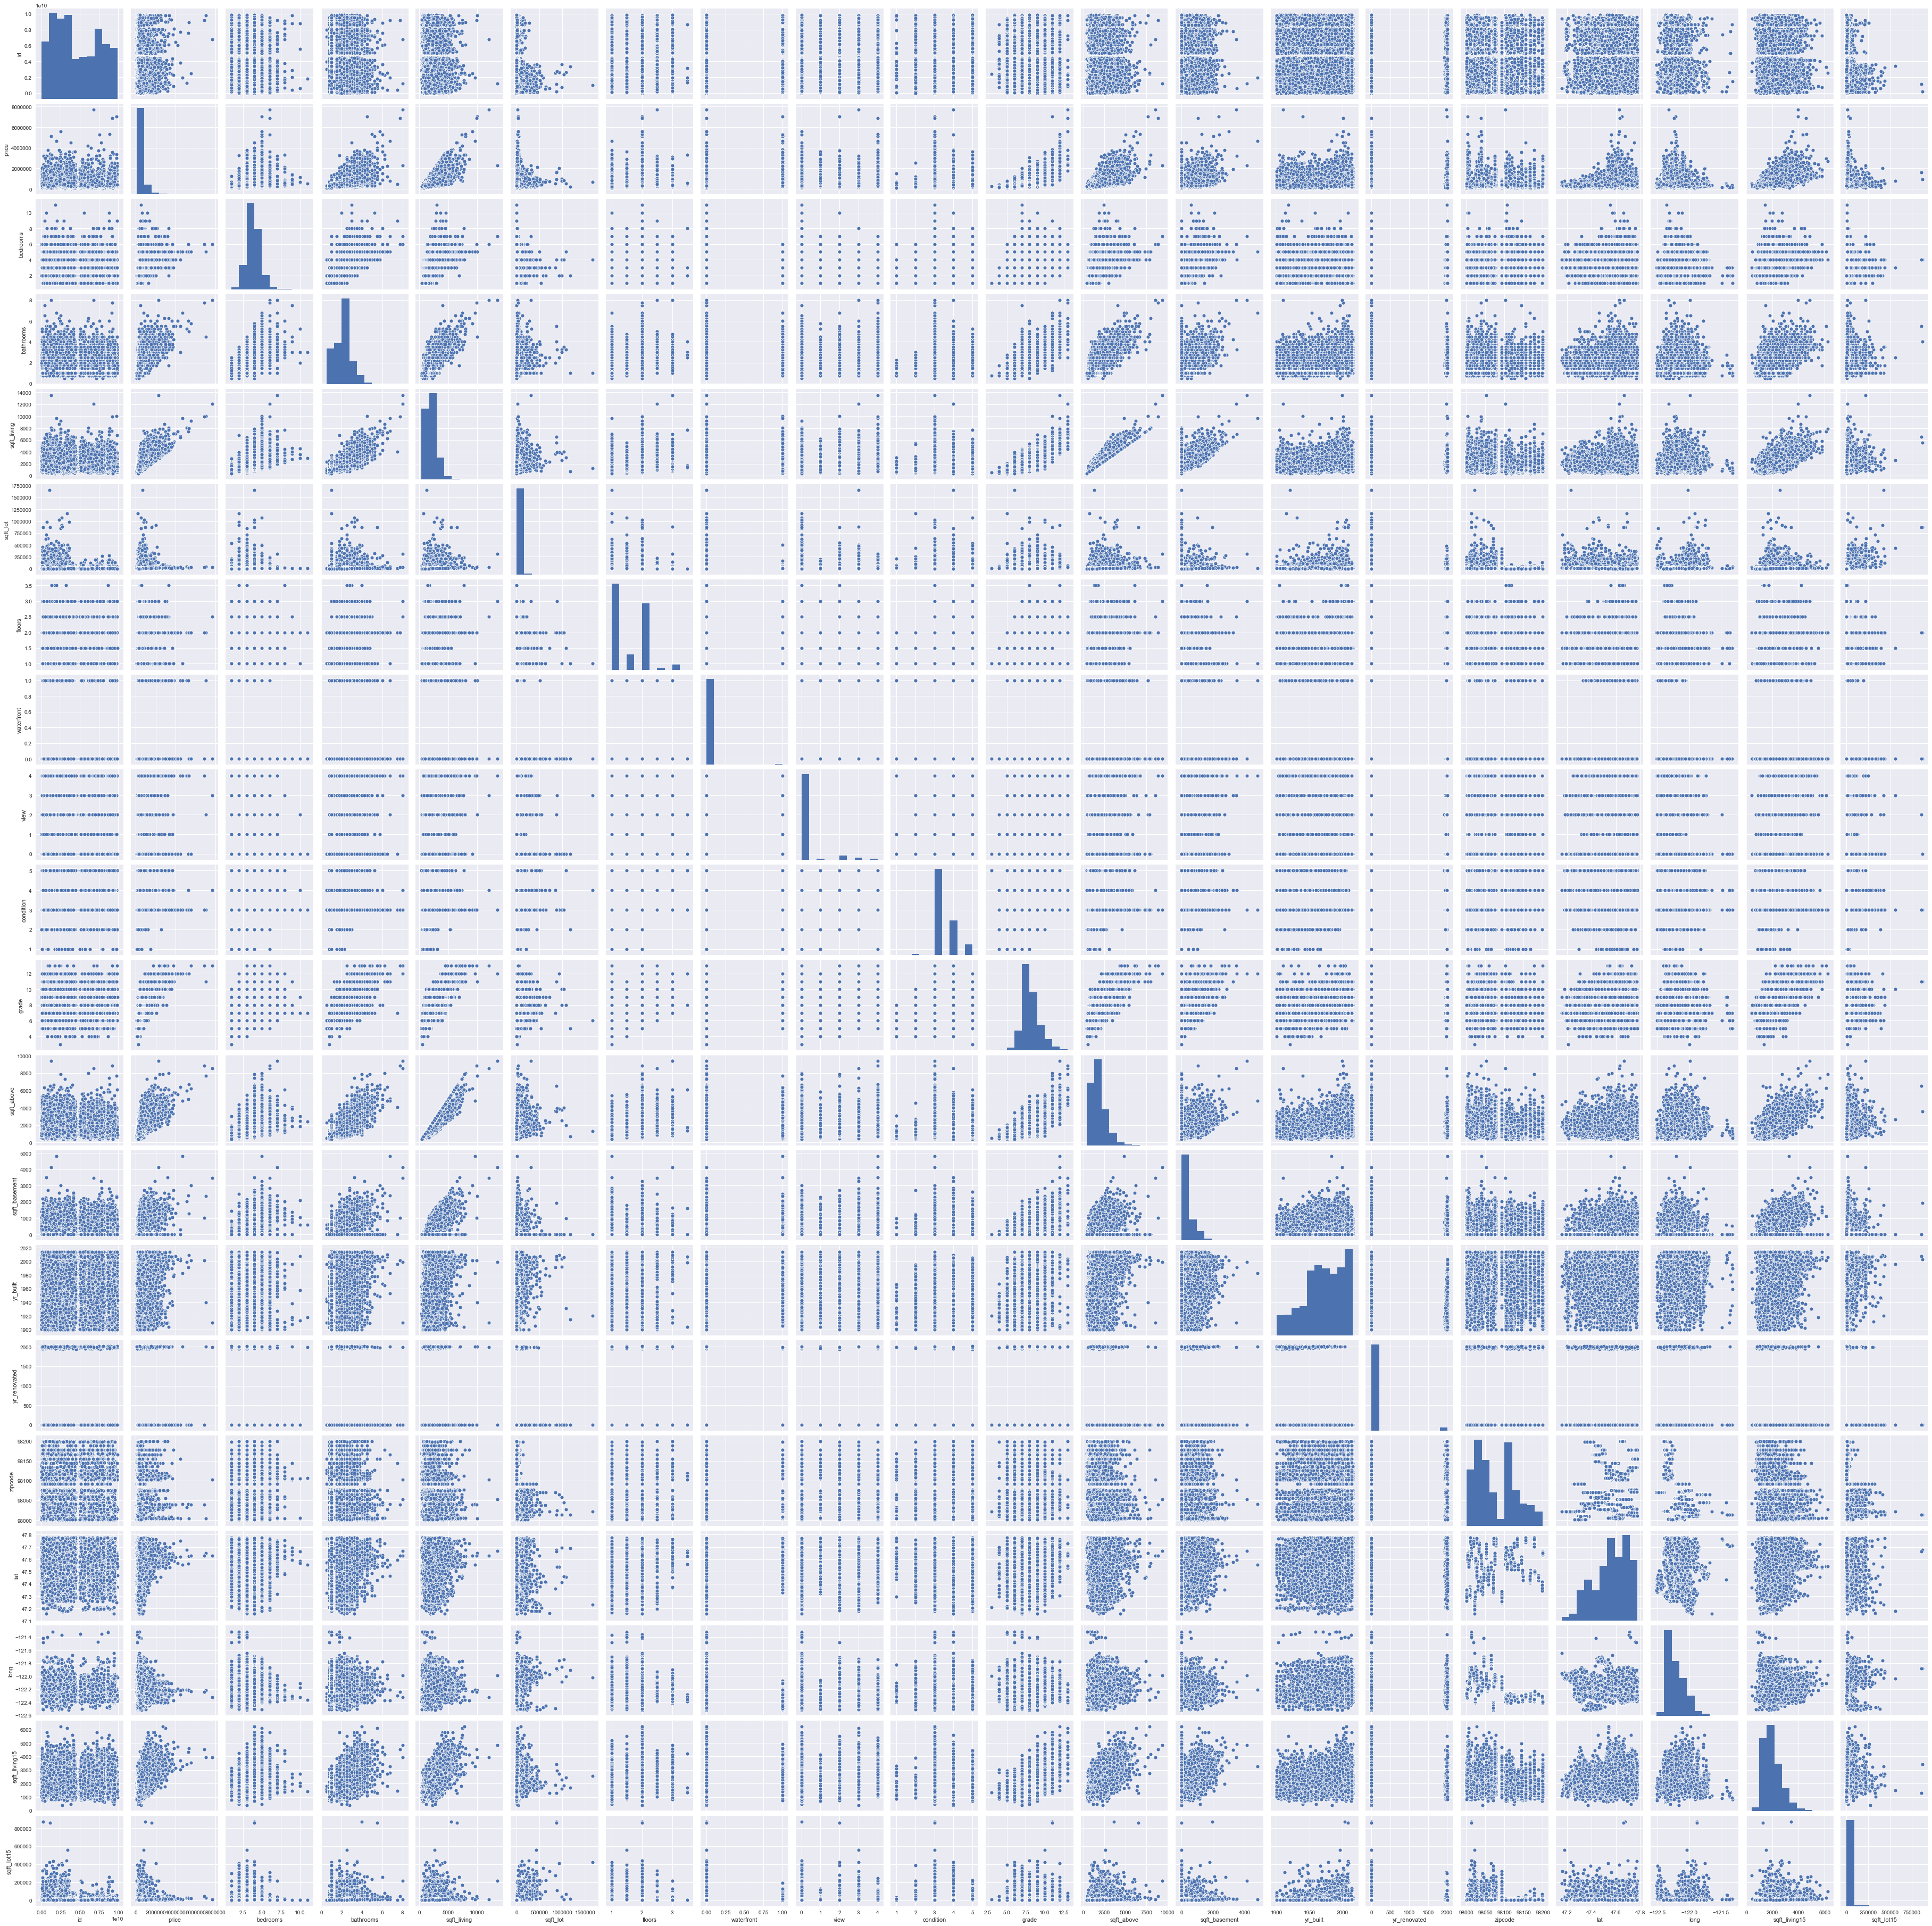

In [64]:
# creating pairplots for all the features:
_ =sns.pairplot(df_house)
plt.savefig('figures/pairplot.png')

This does not really help as there are to many variables. Let's try do it groupwise

### Pairplotting in groups

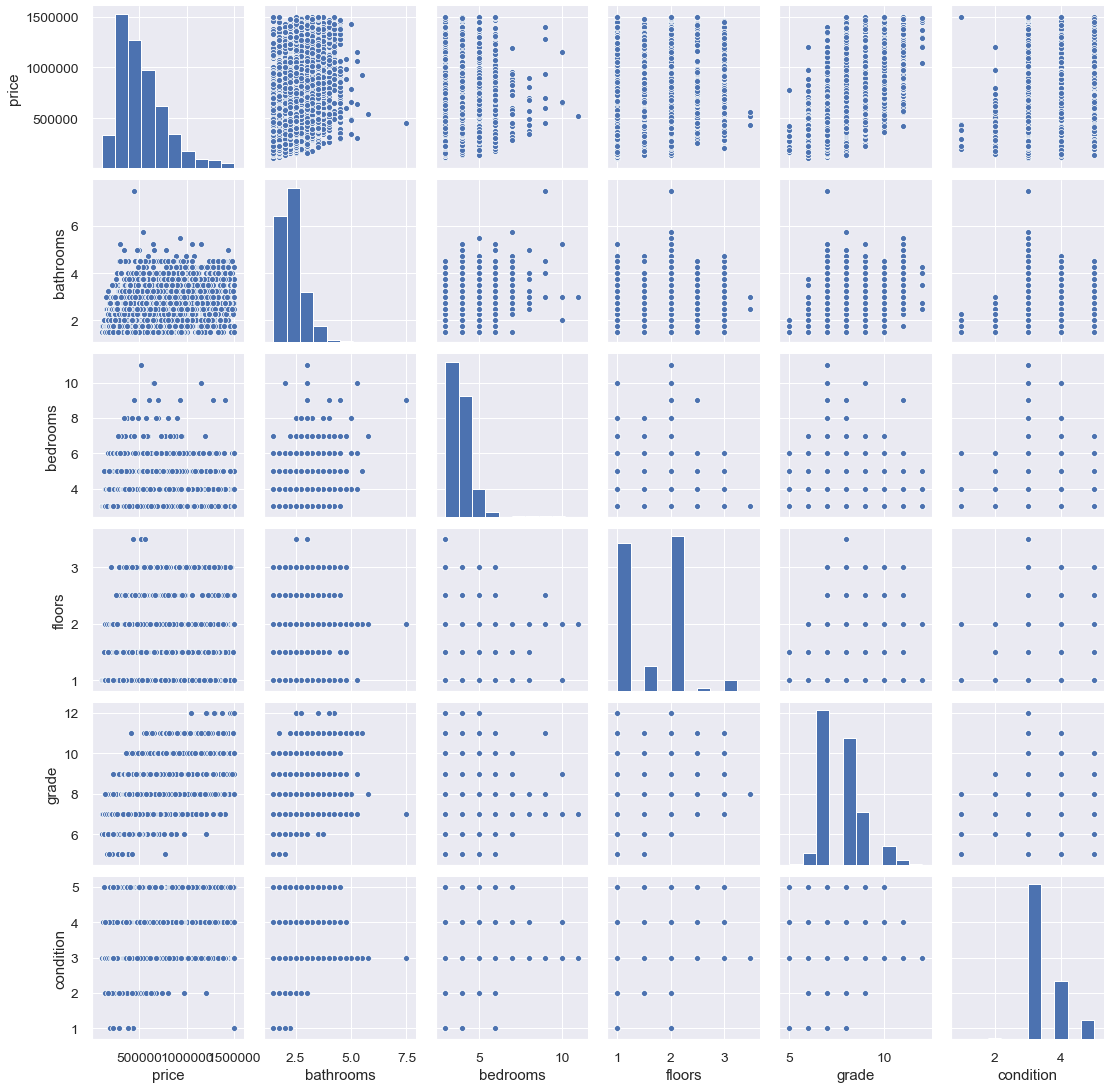

In [363]:
# first the 'categoricals'
sns.pairplot(df_house[['price','bathrooms','bedrooms','floors','grade','condition']])
plt.savefig('figures/pairplot_categoricals.png')

In [185]:
df_house.condition.value_counts()

3    12562
4     5018
5     1530
2      142
1       23
Name: condition, dtype: int64

### As this plot shows: grade seems to have a huge impact on price

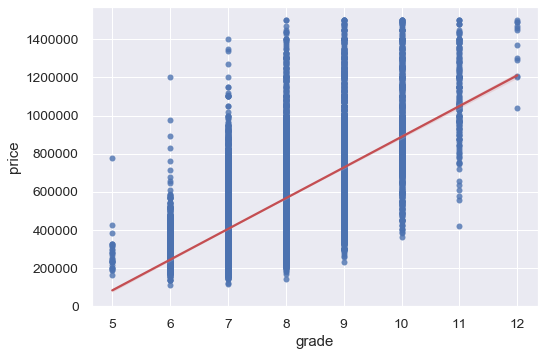

In [409]:
sns.regplot(x='grade',y='price', data=df_house, scatter_kws={'color':'b'},color='r')
plt.savefig('figures/Price_per_grade.png')

In [365]:
df_house.grade.value_counts()

7     6020
8     4949
9     2058
10     711
6      449
11     174
5       29
12      12
Name: grade, dtype: int64

**We see that in the lowest and the highest grade there is only one value each so we will cut these of**

In [172]:
df_house.drop(index=df_house.query('grade == 3 or grade == 13').index,inplace=True)

In [175]:
df_house.grade.value_counts()

7     8548
8     5549
9     2203
6     1924
10     832
11     224
5      207
4       21
12      20
Name: grade, dtype: int64

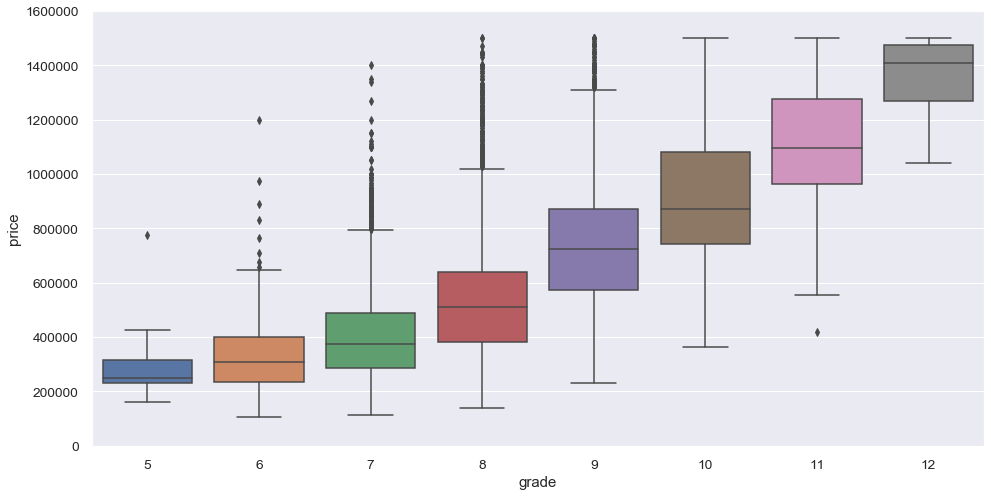

In [368]:
#sns.boxplot((x='grade',y='price', data=df_house))
var = 'grade'
data_grade = pd.concat([df_house['price'],df_house[var]],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y='price', data=data_grade)
fig.axis(ymin=0,ymax=1600000);
plt.xticks()
plt.savefig('figures/boxplot_grade.png')

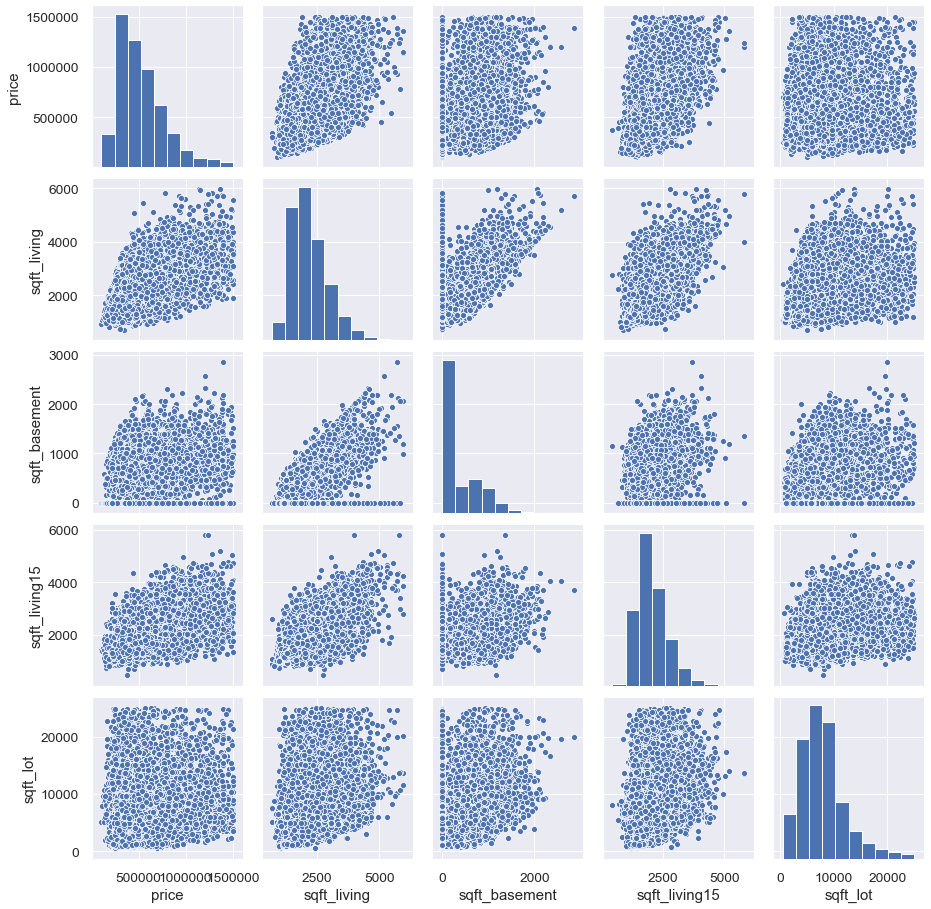

In [369]:
sns.pairplot(df_house[['price','sqft_living','sqft_basement','sqft_living15','sqft_lot']])

### In this plot you can see, that

In [370]:
# Deleting unnecessary features: no price info in id
df_house.drop(columns='id',axis=1, inplace=True)
# sqft_above is the difference between sgft_living and sqft_basement
# sqft_above = sqft_living as there is no basement
# will be cut off:
df_house.drop(columns='sqft_above',axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [95]:
continuous_var = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15','sqft_lot15','sqft_basement']
categorical_var=['bedrooms', 'bathrooms', 'floors', 'grade', 'condition','yr_built','condition']

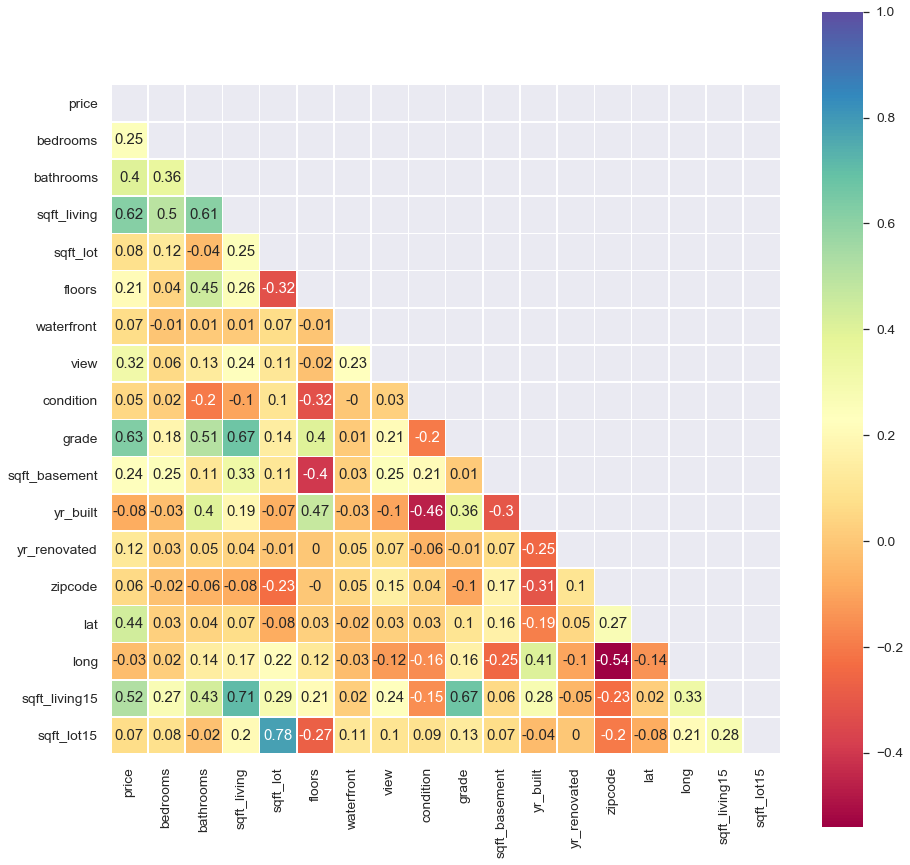

In [371]:
# Plotting the heatmap to evaluate the interesting thing in the data to go into detail
_,ax=plt.subplots(figsize=(15,15))
sns.heatmap(round(df_house.corr(),2)
            ,annot=True
            ,square=True
            ,mask=np.triu(df_house.corr())
            ,cmap='Spectral'
            ,linewidth=.5)
plt.savefig('figures/heatmap_all.png')

### What does the heatmap show?
**We have to look for 'big' values between 'price' and the explanatory variables**
**Following Variables seems to be interesting:**
* grade
* sqft_living 
* sqft_living15
* bathrooms
* view

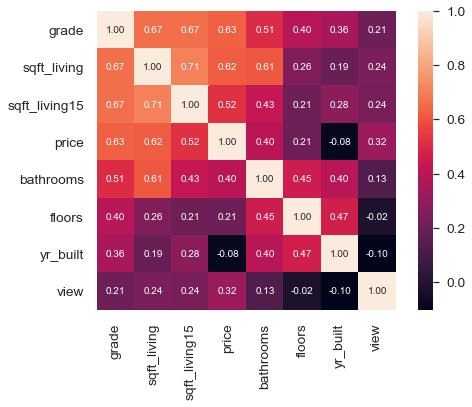

In [437]:
k = 8 #number of variables for heatmap
cols = df_house.corr().nlargest(k, 'grade')['grade'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('figures/price_correlation_matrix_grade')

# 5. Feature Engineering
"Select important features and construct more meaningful ones using the raw data you have."

In [373]:
# creating a copy of the df
house_ft = df_house.copy()

### 5.1 Getting a price/sqft_living

In [374]:
house_ft['price_sqft_liv']=(house_ft['price'] // house_ft['sqft_living'])
house_ft.price_sqft_liv.describe().reset_index()

index  price_sqft_liv
0  count    14402.000000
1   mean      243.614151
2    std       91.103575
3    min       87.000000
4    25%      173.000000
5    50%      232.000000
6    75%      294.000000
7    max      785.000000

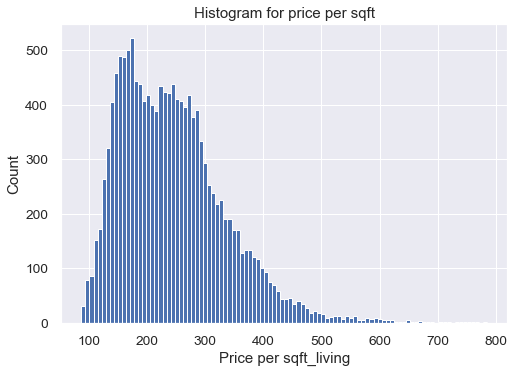

In [375]:
plt.xlabel('Price per sqft_living')
plt.ylabel('Count')
plt.title('Histogram for price per sqft')
house_ft.price_sqft_liv.hist(bins=100)
plt.savefig('figures/price_per_sqft_hist')

## 5.2 Creating a Zipcode Rank by price/sqft_liv

In [376]:
house_ft.groupby('zipcode').median().sort_values('price_sqft_liv').round(2).reset_index()['zipcode'].head()

0    98032
1    98002
2    98001
3    98092
4    98023
Name: zipcode, dtype: int64

In [377]:
# creating a dict of the rank (0 is the most expensive zip,69 the cheapest)
ranked_zip = house_ft.groupby('zipcode').median().sort_values('price_sqft_liv').round(2).reset_index()['zipcode'].to_dict()
ranked2 = dict((y,x) for x,y in ranked_zip.items())

In [378]:
house_ft['zip_rank'] = [ranked2[i] for i in house_ft['zipcode']]
house_ft.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1 2014-12-09  538000         3       2.25         2570      7242     2.0   
3 2014-12-09  604000         4       3.00         1960      5000     1.0   
4 2015-02-18  510000         3       2.00         1680      8080     1.0   
6 2014-06-27  257500         3       2.25         1715      6819     2.0   
7 2015-01-15  291850         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_basement  yr_built  yr_renovated  \
1           0     0          3      7            400      1951          1991   
3           0     0          5      7            910      1965             0   
4           0     0          3      8              0      1987             0   
6           0     0          3      7              0      1995             0   
7           0     0          3      7              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  price_sqft_liv  \
1    98125  47.7210 -122.319           1690        7639             209   
3    98136  47.5208 -122.393           1360        5000             308   
4    98074  47.6168 -122.045           1800        7503             303   
6    98003  47.3097 -122.327           2238        6819             150   
7    98198  47.4095 -122.315           1650        9711             275   

   zip_rank  
1        40  
3        52  
4        41  
6         7  
7        13

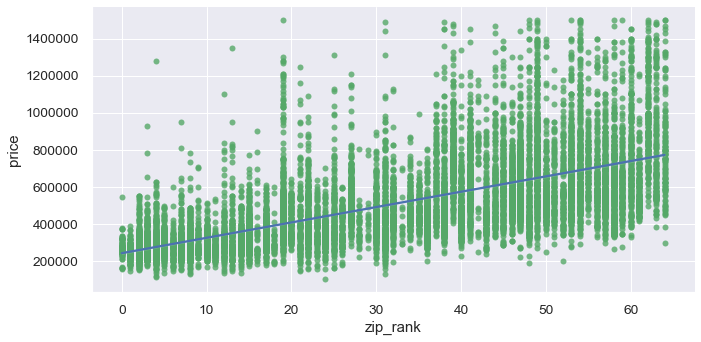

In [417]:
sns.lmplot(x='zip_rank', y='price', data=house_ft, aspect=2,scatter_kws={'color':'g'})
plt.savefig('figures/price_zip.png')
#The higher the zip_rank, the higher the price

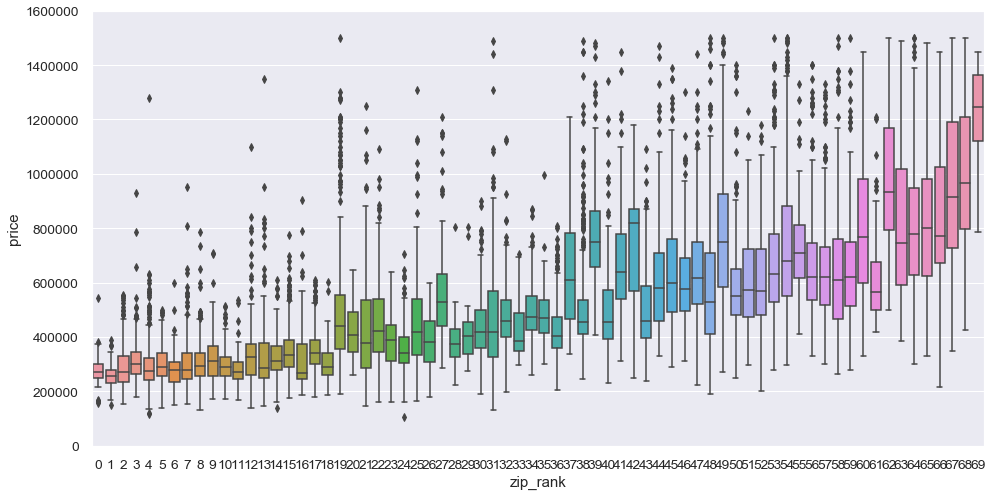

In [381]:
var = 'zip_rank'
data_test = pd.concat([house_ft['price'],house_ft[var]],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y='price', data=data_test)
fig.axis(ymin=0,ymax=1600000);
#plt.xticks()
plt.savefig('figures/boxlot_zip_rank_price')

We will cut the 5 most expensive zip_areas as they are probably not that important for a normal family

In [382]:
house_ft.drop(index=house_ft.query('zip_rank > 64').index,inplace=True)

In [383]:
pd.options.display.max_columns = None

## 5.3 Ratio of Sqft_living and Sqft_lot

In [384]:
house_ft['sqft_liv_lot_ratio']=(((house_ft['sqft_living'])-house_ft['sqft_basement'])//house_ft['floors'])/house_ft['sqft_lot']
house_ft['sqft_liv_lot_ratio'].describe()

count    13925.000000
mean         0.192315
std          0.090015
min          0.028507
25%          0.130481
50%          0.173656
75%          0.235000
max          0.973653
Name: sqft_liv_lot_ratio, dtype: float64

**Finding: In the Dataset are some houses were the sqft_living divided by floors minus basement is still bigger than the lotsize**

In [385]:
# Rows, where this new feature is greaten than one does not make sense, so they will be dropped
house_ft.drop(index=house_ft.query('sqft_liv_lot_ratio > 1').index,inplace=True)

## 5.4 Handling of Categorical Variables
dummy variables need to be created. This needs to be done for the following:
* floors
* grades
* condition

In [272]:
for elem in ['floors', 'grade', 'condition']:
    dummies = pd.get_dummies(house_ft[elem], prefix=elem, drop_first=True)
    house_ft = house_ft.join(dummies)

In [273]:
for elem in ['floors', 'grade', 'condition']:
    house_ft.drop(labels=elem,axis=1,inplace=True)

In [275]:
house_ft.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_sqft_liv', 'zip_rank', 'sqft_liv_lot_ratio', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'condition_2', 'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

In [388]:
dummies_zip=pd.get_dummies(house_ft.zip_rank, prefix='r_zip', drop_first=True)
house_rzip = house_ft.drop(labels='zip_rank',axis=1).join(dummies_zip)

date    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1     2014-12-09   538000         3       2.25         2570      7242     2.0   
3     2014-12-09   604000         4       3.00         1960      5000     1.0   
4     2015-02-18   510000         3       2.00         1680      8080     1.0   
6     2014-06-27   257500         3       2.25         1715      6819     2.0   
7     2015-01-15   291850         3       1.50         1060      9711     1.0   
9     2015-03-12   323000         3       2.50         1890      6560     2.0   
10    2015-04-03   662500         3       2.50         3560      9796     1.0   
13    2014-10-07   400000         3       1.75         1370      9680     1.0   
14    2015-03-12   530000         5       2.00         1810      4850     1.5   
15    2015-01-24   650000         4       3.00         2950      5000     2.0   
16    2014-07-31   395000         3       2.00         1890     14040     2.0   
20    2014-05-14   385000         4       1.75         1620      4980     1.0   
22    2014-07-03   285000         5       2.50         2270      6300     2.0   
24    2014-11-20   329000         3       2.25         2450      6500     2.0   
25    2014-11-03   233000         3       2.00         1710      4697     1.5   
26    2014-06-26   937000         3       1.75         2450      2691     2.0   
28    2014-06-24   438000         3       1.75         1520      6380     1.0   
29    2015-03-02   719000         4       2.50         2570      7173     2.0   
30    2014-11-10   580500         3       2.50         2320      3980     2.0   
32    2014-06-24   687500         4       1.75         2330      5000     1.5   
34    2014-12-03   322500         4       2.75         2060      6659     1.0   
35    2014-06-13   696000         3       2.50         2300      3060     1.5   
37    2014-12-30   640000         4       2.00         2360      6000     2.0   
39    2014-06-20   605000         4       2.50         2620      7553     2.0   
40    2014-07-15   625000         4       2.50         2570      5520     2.0   
41    2014-08-11   775000         4       2.25         4220     24186     1.0   
42    2014-07-07   861990         5       2.75         3595      5639     2.0   
45    2014-07-18   488000         3       2.50         3160     13603     2.0   
47    2014-07-16   785000         4       2.50         2290     13416     2.0   
48    2015-04-28   450000         3       1.75         1250      5963     1.0   
...          ...      ...       ...        ...          ...       ...     ...   
21557 2014-05-20   785000         4       3.50         3070      4684     2.0   
21558 2014-05-07   610950         3       3.00         1680      1570     3.0   
21559 2014-11-11   399950         3       2.50         3087      5002     2.0   
21561 2015-01-23   579000         4       3.25         1900      2631     2.0   
21563 2014-05-29   645000         3       3.25         1730      1229     2.0   
21564 2014-10-03   594866         3       3.00         2780      6000     2.0   
21565 2015-05-04   625000         3       3.00         2780      6000     2.0   
21566 2014-11-12   490000         3       2.25         1500      1290     2.0   
21568 2014-12-02   380000         3       2.50         1260       900     2.0   
21569 2014-08-28   270000         3       2.50         1870      5000     2.0   
21571 2015-03-05   385000         3       2.50         1520      1488     3.0   
21573 2014-09-10   347500         3       2.50         2540      4760     2.0   
21574 2014-05-14  1220000         4       3.50         4910      9444     1.5   
21575 2014-10-02   572000         4       2.75         2770      3852     2.0   
21576 2015-04-16   475000         3       2.25         1190      1200     3.0   
21577 2015-03-17  1090000         5       3.75         4170      8142     2.0   
21578 2014-10-17   350000         4       2.75         2500      5995     2.0   
21580 2014-08-13   679950         5       2

In [408]:
house_ft.groupby('grade').price.mean().round()

grade
5      280544.0
6      329997.0
7      399442.0
8      524618.0
9      721642.0
10     903161.0
11    1088506.0
12    1355833.0
Name: price, dtype: float64

In [414]:
house_ft.describe().round()

price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
count    13925.0   13925.0    13925.0      13925.0   13925.0  13925.0   
mean    517929.0       4.0        2.0       2204.0    8002.0      2.0   
std     239582.0       1.0        1.0        722.0    4165.0      1.0   
min     107000.0       3.0        2.0        710.0     572.0      1.0   
25%     337000.0       3.0        2.0       1670.0    5100.0      1.0   
50%     465000.0       3.0        2.0       2080.0    7500.0      2.0   
75%     645000.0       4.0        2.0       2610.0    9800.0      2.0   
max    1500000.0      11.0        8.0       5960.0   25000.0      4.0   

       waterfront     view  condition    grade  sqft_basement  yr_built  \
count     13925.0  13925.0    13925.0  13925.0        13925.0   13925.0   
mean          0.0      0.0        3.0      8.0          320.0    1977.0   
std           0.0      1.0        1.0      1.0          441.0      27.0   
min           0.0      0.0        1.0      5.0            0.0    1900.0   
25%           0.0      0.0        3.0      7.0            0.0    1961.0   
50%           0.0      0.0        3.0      8.0            0.0    1980.0   
75%           0.0      0.0        4.0      8.0          640.0    2001.0   
max           1.0      4.0        5.0     12.0         2850.0    2015.0   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
count       13925.0  13925.0  13925.0  13925.0        13925.0     13925.0   
mean           61.0  98074.0     48.0   -122.0         2049.0      7865.0   
std           343.0     53.0      0.0      0.0          616.0      4440.0   
min             0.0  98001.0     47.0   -122.0          460.0       651.0   
25%             0.0  98031.0     47.0   -122.0         1590.0      5151.0   
50%             0.0  98058.0     48.0   -122.0         1930.0      7536.0   
75%             0.0  98117.0     48.0   -122.0         2400.0      9576.0   
max          2015.0  98199.0     48.0   -121.0         5790.0     93393.0   

       price_sqft_liv  zip_rank  sqft_liv_lot_ratio  
count         13925.0   13925.0             13925.0  
mean            238.0      33.0                 0.0  
std              85.0      19.0                 0.0  
min              87.0       0.0                 0.0  
25%             171.0      16.0                 0.0  
50%             228.0      36.0                 0.0  
75%             288.0      49.0                 0.0  
max             769.0      64.0                 1.0

# 6. Predictive Modeling
"Train machine learning models, evaluate their performance, and use them to make predictions."

In [421]:
#starting with getting the data from feature engineering:
df = house_ft.copy()

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection
import sklearn.metrics as metrics

In [423]:
# Splitting the data for traing and test purposes
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## First Model - Univariate: Predicting the price just by sqft_living

In [424]:
col = ['sqft_living']
X_train = train_df[col]
X = sms.add_constant(X_train)


y_train = train_df.price
model = sms.OLS(y_train, X_train)
results = model.fit()
results.summary()

/Users/torben/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          9.612e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:20:13   Log-Likelihood:                     -1.5085e+05
No. Observations:               11140   AIC:                                  3.017e+05
Df Residuals:                   11139   BIC:                                  3.017e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   232.6668      0.750    310.037      0.000     231.196     234.138
==============================================================================
Omnibus:                      907.202   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1414.413
Skew:                           0.631   Prob(JB):                    7.31e-308
Kurtosis:                       4.205   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sqft_living seems to explain a lot of the variance in price if lookin g at the train data

In [425]:
# predicting 
y_pred=results.predict(test_df.sqft_living)

Mean Error:  183817.4913530008
average error percentage:  0.3549084539818056


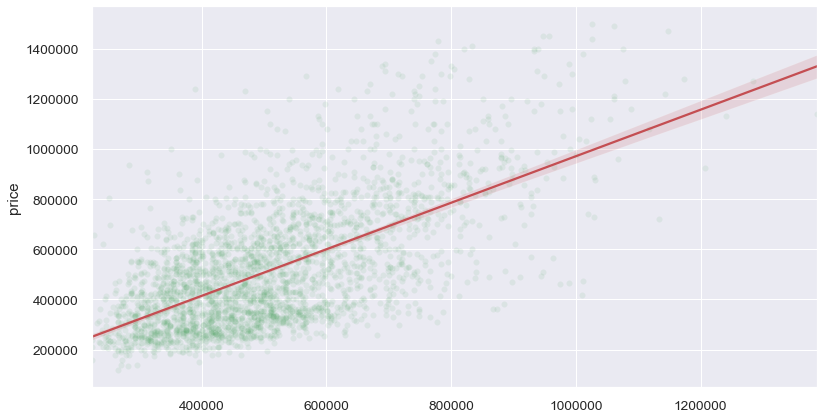

In [426]:
plt.figure(figsize=(13,7))
Y_test = test_df['price']
res = Y_test - y_pred
print('Mean Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('average error percentage: ',(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))/df["price"].mean())

sns.regplot(y_pred,Y_test,scatter_kws={'color':'g','alpha':0.1},color='r')
plt.savefig('figures/first_predic.png')

**This is not a really good prediction of a house price in KC as we can see in the figure and the values above** 

In [312]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_sqft_liv', 'zip_rank', 'sqft_liv_lot_ratio', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'condition_2', 'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

In [403]:
# columns to drop in multivariate regression:

# having grade,sqft_living,bathrooms,view,sqft_basement,sqft_living15,zip_rank as explanatory variables
to_drop1 = ['date','price','bedrooms','sqft_lot','waterfront','yr_built'
             ,'yr_renovated','price_sqft_liv','zipcode','lat', 'long','sqft_lot15','floors_1.5'
             ,'floors_2.0','floors_2.5','floors_3.0','floors_3.5','sqft_liv_lot_ratio']
to_drop2 = ['date','price','bedrooms','sqft_lot','waterfront','yr_built'
             ,'yr_renovated','zipcode','lat', 'long','sqft_lot15']
# only sqft_living, grade and sqft_living15:
to_drop3 = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot'
            ,'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated'
            ,'zipcode', 'lat', 'long', 'sqft_lot15','price_sqft_liv', 'zip_rank'
            , 'sqft_liv_lot_ratio', 'floors_1.5','floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'
            ,'condition_2', 'condition_3', 'condition_4', 'condition_5']
# only grade on price_sqft_liv:
to_drop4 = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated',
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
            'price_sqft_liv', 'zip_rank', 'sqft_liv_lot_ratio', 'floors_1.5',
            'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
            'condition_2', 'condition_3', 'condition_4', 'condition_5']
# ...
to_drop5 = 

### Multivariate llinear Regression for to_drop3

In [348]:
# for to_drop3:
X = df.drop(labels=to_drop3,axis=1)
y = df['price']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Instantiate model
model = LinearRegression()
# Fit Model
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/df["price"].mean())
print("-----------------------")
print(model.intercept_)
print("-----------------------")
for i in model.coef_:
        print(i) 

160299.4309510857
0.3357158332956141
-----------------------
123342.23897871922
-----------------------
104.72470950475658
11.750061931675361
1367.0647596357178
37632.82480068607
73821.24702438405
145518.5416013906
266848.7449111129
378686.220373205
514501.0949076033
740936.1097949698


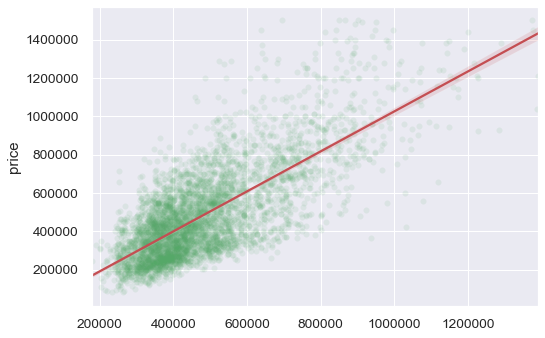

In [349]:
_drop3 = sns.regplot(y_pred,y_test,scatter_kws={'color':'g','alpha':0.1},color='r')
plt.savefig('figures/linreg3.png)

### Multivariate llinear Regression for to_drop2

In [350]:
# for to_drop2:
X = df.drop(labels=to_drop2,axis=1)
y = df['price']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Instantiate model
model = LinearRegression()
# Fit Model
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/df["price"].mean())
print("-----------------------")
print(model.intercept_)
print("-----------------------")
for i in model.coef_:
        print(i) 

66413.20639870061
0.13908948269926705
-----------------------
-443715.76135324786
-----------------------
14390.256725924179
197.85155762767445
21165.419439081852
-3.2336971645744734
-0.8858517209085959
1276.1557202333074
1795.044772530026
-75074.66816295618
11179.352226155646
-6063.724272463281
16262.54084805892
-17769.324365437475
-30612.099982394688
50127.33935470036
70766.51809937396
87595.44414593793
107216.80648113941
151856.91006177102
192840.35591307588
255661.78454463556
359475.89692612947
28123.15257304518
25714.603338167126
39090.498119309756
55465.327903355195


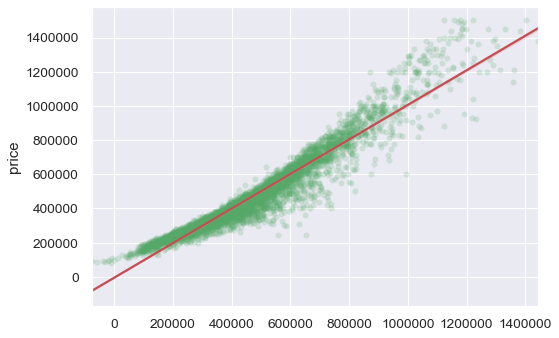

In [352]:
_drop2 = sns.regplot(y_pred,y_test,scatter_kws={'color':'g','alpha':0.2},color='r')

### Multivariate llinear Regression for to_drop1

In [404]:
# for to_drop1:
X = df.drop(labels=to_drop1,axis=1)
y = df['price']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Instantiate model
model = LinearRegression()
# Fit Model
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# RMSE
print('R_squared: ', metrics.r2_score(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/df["price"].mean())
print("-----------------------")
print(model.intercept_)
print("-----------------------")
for i in model.coef_:
        print(i) 

R_squared:  0.8295064206504674
97452.2434692646
0.20409468036598574
-----------------------
-169486.18710648926
-----------------------
3398.5856452692638
114.71051494870083
49436.565676868675
-19.75663113878871
34.03603049789251
6382.45322128712
-13502.834227235373
-12560.80250412217
2668.486072369419
35133.70372176553
119536.2192873452
196637.88437822287
308824.0065725834
406125.0172354607
64562.26605214587
86461.7609433353
118670.37034005387
153905.3198817469


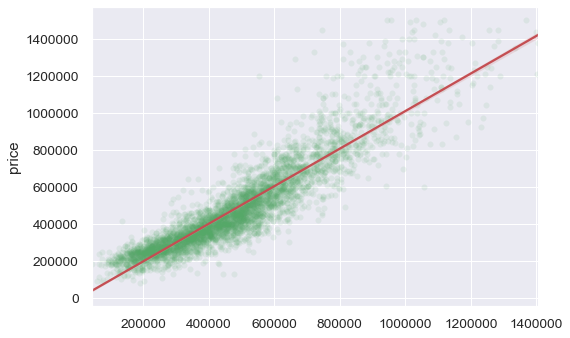

In [400]:
_drop1 = sns.regplot(y_pred,y_test,scatter_kws={'color':'g','alpha':0.1},color='r')
plt.savefig('figures/best_pred.png')

In [357]:
# for to_drop4:
X = df.drop(labels=to_drop4,axis=1)
y = df['price_sqft_liv']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Instantiate model
model = LinearRegression()
# Fit Model
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/df["price_sqft_liv"].mean())
print("-----------------------")
print(model.intercept_)
print("-----------------------")
for i in model.coef_:
        print(i)

98.95604394979024
0.39054687926475634
-----------------------
351.44444444444264
-----------------------
-68.55003450655423
-80.97344514325388
-104.66225508581934
-101.55067709647331
-92.59860542670684
-80.31510081509799
-70.07602339180998
-41.81944444444152


# Conclusion and future work

* **Putting more effort into the effect of location**
* **Adding external data to the model like crime statistics, access to health- and childcare etc.**
* **Further improvement of  the prediction model**
* **Get more recent data or compare datasets from different times to evaluate change**
